In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from src.cleantext import *

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential

# Import Yelp dataset

In [ ]:
data = pd.read_csv('../cap2/data/predicted_review.csv').drop(columns= ['business_id', 'user_id'])

In [ ]:
data['True(1)/Deceptive(0)'] = (data['True(1)/Deceptive(0)'] == 'True').astype(bool)

In [ ]:
type(data['True(1)/Deceptive(0)'][0])

**seperating to 2 dfs**

In [ ]:
true = data[data['True(1)/Deceptive(0)'] == 1]

In [ ]:
true.to_csv('true.csv')

In [ ]:
decep = data[data['True(1)/Deceptive(0)'] == 0]
decep.to_csv('decep.csv')

In [ ]:
true = pd.read_csv('true.csv').drop(columns='Unnamed: 0')

In [ ]:
decep = pd.read_csv('decep.csv').drop(columns='Unnamed: 0')

In [ ]:
true.isnull().sum()

In [ ]:
decep.isnull().sum()

Sample 100,000 data for faster processing

In [ ]:
true_samp = true.sample(100000, random_state = 123)

In [ ]:
decep_samp = decep.sample(100000, random_state = 123)

**pre processing the data**

clean text

In [ ]:
true_samp.Review = cleanText(true_samp.Review)

In [ ]:
decep_samp.Review = cleanText(decep_samp.Review)

tokenize

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
true_samp.Review = true_samp['Review'].apply(word_tokenize)

In [ ]:
decep_samp.Review = decep_samp['Review'].apply(word_tokenize)

Remove stopwords

In [ ]:
nltk.download('stopwords')

In [ ]:
stopwords_ = set(stopwords.words('english'))

In [ ]:
true_samp.Review = true_samp.Review.apply(lambda x: [item for item in x if item not in stopwords_ ])

In [ ]:
decep_samp.Review = decep_samp.Review.apply(lambda x: [item for item in x if item not in stopwords_ ])

Stemming

In [ ]:
stemmer = SnowballStemmer("english")
true_samp.Review = true_samp.Review.apply(lambda x: [stemmer.stem(y) for y in x])
decep_samp.Review = decep_samp.Review.apply(lambda x: [stemmer.stem(y) for y in x])

Detokenized

In [ ]:
true_samp.Review = true_samp.Review.apply(lambda x:' '.join([y for y in x ]))
decep_samp.Review = decep_samp.Review.apply(lambda x:' '.join([y for y in x ]))

In [ ]:
true_samp.to_csv('true_samp.csv')
decep_samp.to_csv('decep_samp.csv')

# Data Loaded to CSV checkpoint

In [3]:
true_samp = pd.read_csv('true_samp.csv')
true_samp.drop(columns='Unnamed: 0', inplace = True)

In [24]:
decep_samp = pd.read_csv('decep_samp.csv')
decep_samp.drop(columns='Unnamed: 0', inplace = True)

Vectorize

In [5]:
true_samp = true_samp[['Review', 'Stars']]

In [25]:
decep_samp = decep_samp[['Review','Stars']]

**use first 50k of sampled data for faster processing / able to keep track of the sample set**

In [7]:
true_samp.Review = true_samp.Review.fillna('None')

In [11]:
true_samp_vec = vectorize(true_samp[:50000]['Review'], max_feat= 1000)

In [26]:
decep_samp.Review = decep_samp.Review.fillna('None')

In [27]:
decep_samp_vec = vectorize(decep_samp[:50000]['Review'], max_feat= 1000)

Combine vector with other feature 

In [28]:
decep_samp_vec['Stars'] = decep_samp['Stars'][:50000]

In [ ]:
decep_samp_vec

In [17]:
true_samp_vec['Stars'] = true_samp['Stars'][:50000]

In [ ]:
true_samp_vec.iloc[:, :-1].values

Save vectors to pickle files

In [18]:
true_samp_vec.to_pickle('data/true_samp_vec_1000.pkl')

In [29]:
decep_samp_vec.to_pickle('data/decep_samp_vec_1000.pkl')

# Vectorized frames data checkpoint

In [4]:
true_samp_vec = pd.read_pickle('data/true_samp_vec_1000.pkl')
decep_samp_vec = pd.read_pickle('data/decep_samp_vec_1000.pkl')

In [20]:
true_samp_vec.head()

,abl,absolut,accommod,across,actual,ad,add,addit,afternoon,ago,...,yelp,yes,yet,york,youll,young,your,yum,yummi,Stars
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.284523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [30]:
decep_samp_vec.head()

,abl,absolut,accommod,acknowledg,across,actual,ad,add,addit,adult,...,yes,yesterday,yet,york,youll,young,your,yum,yummi,Stars
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4,0.0,0.0,0.122884,0.0,0.0,0.0,0.135446,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


split

In [176]:
X_true_train, X_true_test = train_test_split(true_samp_vec.iloc[:, :-1].values, test_size = 0.2, random_state = 123)

In [177]:
X_true_train.shape

(40000, 1000)

In [178]:
X_true_test.shape

(10000, 1000)

# First Simple Auto Enconding Model

In [ ]:
# #model without rating feature
# model = Sequential()
# model.add(Dense(25, input_dim=X_true_train.shape[1], activation='relu'))
# model.add(Dense(3, activation='relu'))
# model.add(Dense(25, activation='relu'))
# model.add(Dense(X_true_train.shape[1])) # Multiple output neurons
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(X_true_train,X_true_train,verbose=1,epochs=100)

**MLP model vector without rating feature, epoch = 5**

In [32]:
model = Sequential()
model.add(Dense(25, input_dim=X_true_train.shape[1], activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(X_true_train.shape[1])) # Multiple output neurons
c = model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_true_train,X_true_train,verbose=1,epochs=5)

Train on 40000 samples
Epoch 1/5
40000/40000 [==============================] - 3s 68us/sample - loss: 9.4529e-04
Epoch 2/5
40000/40000 [==============================] - 2s 51us/sample - loss: 9.3040e-04
Epoch 3/5
40000/40000 [==============================] - 2s 52us/sample - loss: 9.2395e-040s - loss
Epoch 4/5
40000/40000 [==============================] - 2s 54us/sample - loss: 9.2215e-04
Epoch 5/5
40000/40000 [==============================] - 2s 56us/sample - loss: 9.2022e-04


In [ ]:
#MLP model.save('mlp_yelp_no_rating.h5')

In [33]:
pred = model.predict(X_true_test)
score1 = np.sqrt(metrics.mean_squared_error(pred,X_true_test))
print(f"Insample True Reviews Score (RMSE): {score1}".format(score1))

Insample True Reviews Score (RMSE): 0.03033289194484629


In [34]:
pred = model.predict(true_samp_vec.iloc[:, :-1].values)
score2 = np.sqrt(metrics.mean_squared_error(pred,true_samp_vec.iloc[:, :-1].values))
print(f"Out of Sample True Reviews Score (RMSE): {score2}")

Out of Sample True Reviews Score (RMSE): 0.0303206738419857


In [35]:
pred = model.predict(decep_samp_vec.iloc[:, :-1].values)
score3 = np.sqrt(metrics.mean_squared_error(pred,decep_samp_vec.iloc[:, :-1].values))
print(f"Deceptive Reviews Score (RMSE): {score3}")

Deceptive Reviews Score (RMSE): 0.03165322070748198


**MLP model vector with rating feature, epoch = 5**

In [179]:
X_true_train, X_true_test = train_test_split(true_samp_vec.values, test_size = 0.2, random_state = 123)

In [46]:
#MLP model with rating feature
model = Sequential()
model.add(Dense(25, input_dim=X_true_train.shape[1], activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(X_true_train.shape[1])) # Multiple output neurons
model.compile(loss='mean_squared_error', optimizer='adam' )
model.fit(X_true_train,X_true_train,verbose=1,epochs=5)

Train on 40000 samples
Epoch 1/5
40000/40000 [==============================] - 2s 59us/sample - loss: 0.00250s - loss: 0
Epoch 2/5
40000/40000 [==============================] - 2s 53us/sample - loss: 9.6131e-04
Epoch 3/5
40000/40000 [==============================] - 2s 60us/sample - loss: 9.5707e-04
Epoch 4/5
40000/40000 [==============================] - 2s 56us/sample - loss: 9.5443e-04
Epoch 5/5
40000/40000 [==============================] - 2s 58us/sample - loss: 9.5251e-04


In [47]:
pred = model.predict(X_true_test)
score1 = np.sqrt(metrics.mean_squared_error(pred,X_true_test))
pred = model.predict(true_samp_vec.values)
score2 = np.sqrt(metrics.mean_squared_error(pred,true_samp_vec.values))
pred = model.predict(decep_samp_vec.values)
score3 = np.sqrt(metrics.mean_squared_error(pred,decep_samp_vec.values))
print(f"Insample True Reviews Score (RMSE): {score1}".format(score1))
print(f"Out of Sample True Reviews Score (RMSE): {score2}")
print(f"Deceptive Reviews Score (RMSE): {score3}")

Insample True Reviews Score (RMSE): 0.030878646129114905
Out of Sample True Reviews Score (RMSE): 0.03086933004281668
Deceptive Reviews Score (RMSE): 0.031969273969535764


**MLP model with rating feature, increase epoch**

In [48]:
model = Sequential()
model.add(Dense(25, input_dim=X_true_train.shape[1], activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(X_true_train.shape[1])) # Multiple output neurons
model.compile(loss='mean_squared_error', optimizer='adam' )
model.fit(X_true_train,X_true_train,verbose=1,epochs=100)

Train on 40000 samples
Epoch 1/100
40000/40000 [==============================] - 2s 62us/sample - loss: 0.0020
Epoch 2/100
40000/40000 [==============================] - 2s 58us/sample - loss: 9.6395e-04
Epoch 3/100
40000/40000 [==============================] - 2s 62us/sample - loss: 9.5401e-040s - loss: 9.54
Epoch 4/100
40000/40000 [==============================] - 2s 54us/sample - loss: 9.5071e-04
Epoch 5/100
40000/40000 [==============================] - 2s 55us/sample - loss: 9.4747e-041s - loss: 9. - ETA: 0s - l
Epoch 6/100
40000/40000 [==============================] - 2s 55us/sample - loss: 9.4516e-040s - loss: 9.
Epoch 7/100
40000/40000 [==============================] - 2s 54us/sample - loss: 9.4338e-040s - loss: 
Epoch 8/100
40000/40000 [==============================] - 3s 63us/sample - loss: 9.4183e-04
Epoch 9/100
40000/40000 [==============================] - 3s 63us/sample - loss: 9.4083e-04
Epoch 10/100
40000/40000 [==============================] - 2s 58us/sample - l

40000/40000 [==============================] - 2s 59us/sample - loss: 9.1310e-04TA: 0s
Epoch 81/100
40000/40000 [==============================] - 2s 60us/sample - loss: 9.1310e-04
Epoch 82/100
40000/40000 [==============================] - 2s 53us/sample - loss: 9.1300e-04
Epoch 83/100
40000/40000 [==============================] - 2s 57us/sample - loss: 9.1298e-040s - l - ETA: 0s - loss: 9.1316
Epoch 84/100
40000/40000 [==============================] - 2s 51us/sample - loss: 9.1290e-04
Epoch 85/100
40000/40000 [==============================] - 2s 59us/sample - loss: 9.1295e-04
Epoch 86/100
40000/40000 [==============================] - 2s 57us/sample - loss: 9.1287e-040s - loss - ETA: 0s - loss: 9.1301e
Epoch 87/100
40000/40000 [==============================] - 2s 57us/sample - loss: 9.1281e-04
Epoch 88/100
40000/40000 [==============================] - 2s 54us/sample - loss: 9.1277e-040s - loss: 9.1269
Epoch 89/100
40000/40000 [==============================] - 2s 56us/sample - l

In [49]:
pred = model.predict(X_true_test)
score1 = np.sqrt(metrics.mean_squared_error(pred,X_true_test))
pred = model.predict(true_samp_vec.values)
score2 = np.sqrt(metrics.mean_squared_error(pred,true_samp_vec.values))
pred = model.predict(decep_samp_vec.values)
score3 = np.sqrt(metrics.mean_squared_error(pred,decep_samp_vec.values))
print(f"Insample True Reviews Score (RMSE): {score1}".format(score1))
print(f"Out of Sample True Reviews Score (RMSE): {score2}")
print(f"Deceptive Reviews Score (RMSE): {score3}")

Insample True Reviews Score (RMSE): 0.030218103642040493
Out of Sample True Reviews Score (RMSE): 0.030201460947785495
Deceptive Reviews Score (RMSE): 0.031650776964433885


**more mlp**

In [182]:
model = Sequential()
model.add(Dense(200, input_dim=X_true_train.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(X_true_train.shape[1])) # Multiple output neurons
model.compile(loss='mean_squared_error', optimizer='adam' )
model.fit(X_true_train,X_true_train,verbose=1,epochs=10)

Train on 40000 samples
Epoch 1/10
40000/40000 [==============================] - 4s 98us/sample - loss: 0.0013
Epoch 2/10
40000/40000 [==============================] - 4s 98us/sample - loss: 9.6960e-040
Epoch 3/10
40000/40000 [==============================] - 4s 91us/sample - loss: 9.5771e-04
Epoch 4/10
40000/40000 [==============================] - 4s 90us/sample - loss: 9.5161e-04
Epoch 5/10
40000/40000 [==============================] - 4s 89us/sample - loss: 9.4736e-04
Epoch 6/10
40000/40000 [==============================] - 4s 89us/sample - loss: 9.4209e-04
Epoch 7/10
40000/40000 [==============================] - 4s 92us/sample - loss: 9.3928e-04
Epoch 8/10
40000/40000 [==============================] - 3s 85us/sample - loss: 9.3710e-04
Epoch 9/10
40000/40000 [==============================] - 4s 96us/sample - loss: 9.3542e-04
Epoch 10/10
40000/40000 [==============================] - 4s 89us/sample - loss: 9.3385e-04


In [183]:
pred = model.predict(X_true_test)
score1 = np.sqrt(metrics.mean_squared_error(pred,X_true_test))
pred = model.predict(true_samp_vec.values)
score2 = np.sqrt(metrics.mean_squared_error(pred,true_samp_vec.values))
pred = model.predict(decep_samp_vec.values)
score3 = np.sqrt(metrics.mean_squared_error(pred,decep_samp_vec.values))
print(f"Insample True Reviews Score (RMSE): {score1}".format(score1))
print(f"Out of Sample True Reviews Score (RMSE): {score2}")
print(f"Deceptive Reviews Score (RMSE): {score3}")

Insample True Reviews Score (RMSE): 0.030559000089406357
Out of Sample True Reviews Score (RMSE): 0.030537694284503543
Deceptive Reviews Score (RMSE): 0.03186873998458336


# Trying LSTM Model

**NEED TO USE TENSORFLOW VECTORIZER**

In [171]:
X_true_train, X_true_test = train_test_split(true_samp_vec, test_size = 0.2, random_state = 123)

In [172]:
X_true_train

,abl,absolut,accommod,across,actual,ad,add,addit,afternoon,ago,...,yelp,yes,yet,york,youll,young,your,yum,yummi,Stars
2660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.109985,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,5.0
32815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.198144,0.0,0.0,0.0,0.0,4.0
35141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.243964,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,5.0
19390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,5.0
34846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,4.0
15377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
17730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,4.0
28030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,3.0


In [87]:
#imports for LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.externals import joblib
import tensorflow as tf
from tensorflow.keras.layers import Input, Dropout, Dense, LSTM, RepeatVector, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

In [88]:
#normalize data
scaler = MinMaxScaler()
X_true_train2 = scaler.fit_transform(X_true_train)
X_true_test2 = scaler.fit_transform(X_true_test)

In [90]:
#reshape for LSTM model
X_true_train2 = X_true_train.values.reshape(X_true_train2.shape[0], 1, X_true_train2.shape[1])
X_true_test2 = X_true_test.values.reshape(X_true_test2.shape[0], 1, X_true_test2.shape[1])
print(X_true_train2.shape, X_true_test2.shape)

(40000, 1, 1001) (10000, 1, 1001)


In [91]:
#define autoencoder network model
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(40, activation = 'relu', return_sequences = True)(inputs)
    L2 = LSTM(5, activation = 'relu', return_sequences = False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(5, activation = 'relu', return_sequences = True)(L3)
    L5 = LSTM(40, activation= 'relu', return_sequences = True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)
    model = Model(inputs=inputs, outputs=output)
    return model

In [92]:
model = autoencoder_model(X_true_train2)
model.compile(optimizer='adam', loss = 'mae')
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1, 1001)]         0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 1, 16)             65152     
_________________________________________________________________
lstm_9 (LSTM)                (None, 4)                 336       
_________________________________________________________________
repeat_vector_2 (RepeatVecto (None, 1, 4)              0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 1, 4)              144       
_________________________________________________________________
lstm_11 (LSTM)               (None, 1, 16)             1344      
_________________________________________________________________
time_distributed_2 (TimeDist (None, 1, 1001)           1701

In [76]:
#fit model to the data
nb_epochs = 100
batch_size = 10
history = model.fit(X_true_train2, X_true_train2, epochs=nb_epochs, batch_size = batch_size, validation_split = 0.05).history

Train on 38000 samples, validate on 2000 samples
Epoch 1/100
38000/38000 [==============================] - 18s 483us/sample - loss: 0.0077 - val_loss: 0.0068
Epoch 2/100
38000/38000 [==============================] - 14s 381us/sample - loss: 0.0066 - val_loss: 0.0066
Epoch 3/100
38000/38000 [==============================] - 14s 373us/sample - loss: 0.0066 - val_loss: 0.0066
Epoch 4/100
38000/38000 [==============================] - 16s 417us/sample - loss: 0.0066 - val_loss: 0.0066
Epoch 5/100
38000/38000 [==============================] - 15s 384us/sample - loss: 0.0066 - val_loss: 0.0066
Epoch 6/100
38000/38000 [==============================] - 14s 380us/sample - loss: 0.0066 - val_loss: 0.0066
Epoch 7/100
38000/38000 [==============================] - 15s 386us/sample - loss: 0.0066 - val_loss: 0.0066
Epoch 8/100
38000/38000 [==============================] - 15s 397us/sample - loss: 0.0066 - val_loss: 0.0066
Epoch 9/100
38000/38000 [==============================] - 14s 380us/sa

38000/38000 [==============================] - 14s 361us/sample - loss: 0.0066 - val_loss: 0.0066
Epoch 75/100
38000/38000 [==============================] - 14s 361us/sample - loss: 0.0066 - val_loss: 0.0066
Epoch 76/100
38000/38000 [==============================] - 14s 360us/sample - loss: 0.0066 - val_loss: 0.0066
Epoch 77/100
38000/38000 [==============================] - 14s 361us/sample - loss: 0.0066 - val_loss: 0.0066
Epoch 78/100
38000/38000 [==============================] - 14s 363us/sample - loss: 0.0066 - val_loss: 0.0066
Epoch 79/100
38000/38000 [==============================] - 14s 379us/sample - loss: 0.0066 - val_loss: 0.0066
Epoch 80/100
38000/38000 [==============================] - 14s 367us/sample - loss: 0.0066 - val_loss: 0.0066
Epoch 81/100
38000/38000 [==============================] - 14s 359us/sample - loss: 0.0066 - val_loss: 0.0066
Epoch 82/100
38000/38000 [==============================] - 14s 364us/sample - loss: 0.0066 - val_loss: 0.0066
Epoch 83/100
3

In [78]:
#model.save('LSTM_yelp.h5')

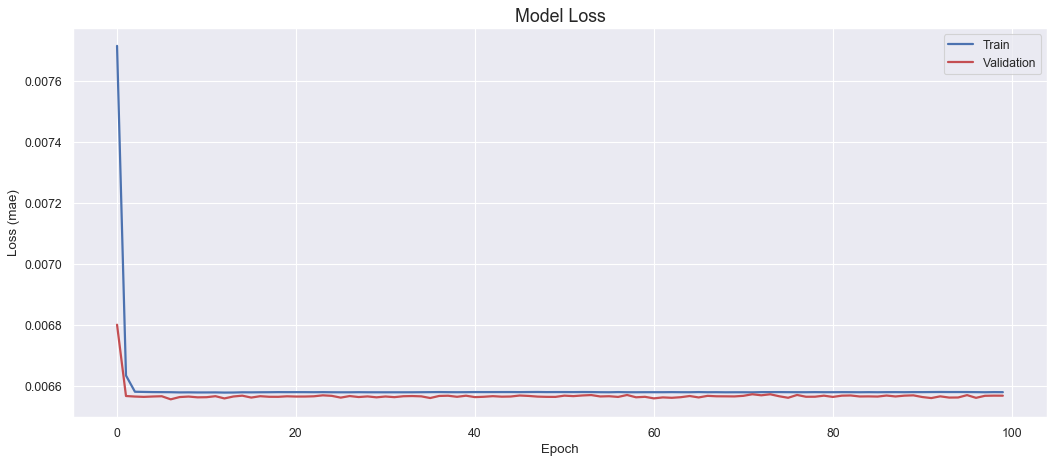

<Figure size 432x288 with 0 Axes>

In [101]:
#plot training losses
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set(color_codes = True)

fig,ax = plt.subplots(figsize=(14,6), dpi=80)
ax.plot(history['loss'],'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label ='Validation', linewidth = 2)
ax.set_title('Model Loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()
plt.savefig('img/training_loss.png')

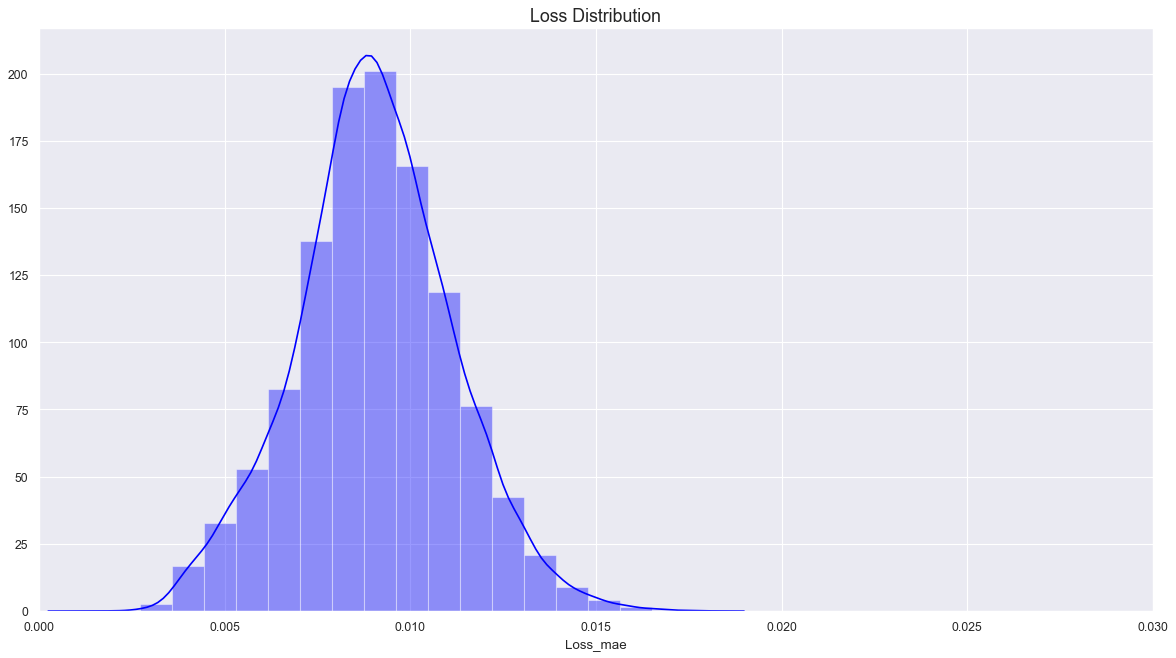

In [102]:
#plot  
X_pred = model.predict(X_true_train2)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns = X_true_train.columns)
X_pred.index = X_true_train.index

scored = pd.DataFrame(index = X_true_train.index)
Xtrain = X_true_train2.reshape(X_true_train2.shape[0], X_true_train2.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtrain), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize= 16)
sns.distplot(scored['Loss_mae'], bins =20, kde= True, color= 'blue');
plt.xlim([0.0,0.03])
plt.savefig('img/loss_dist_train.png')

In [103]:
#calculate loss on test set
X_pred = model.predict(X_true_test2)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns = X_true_test.columns)
X_pred.index = X_true_test.index

scored = pd.DataFrame(index = X_true_test.index)
Xtest = X_true_test2.reshape(X_true_test2.shape[0], X_true_test2.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtest), axis=1)
scored['Threshold'] = 0.02 #testing Threshold at 0.02 according to the histogram
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.head()

,Loss_mae,Threshold,Anomaly
11872,0.008233,0.02,False
40828,0.011485,0.02,False
36400,0.009150,0.02,False
5166,0.010091,0.02,False
30273,0.006181,0.02,False


In [104]:
#calculate the same metrics for the training set and merge all data in single DF for plotting
X_pred_train = model.predict(X_true_train2)
X_pred_train = X_pred_train.reshape(X_pred_train.shape[0], X_pred_train.shape[2])
X_pred_train = pd.DataFrame(X_pred_train, columns = X_true_train.columns)
X_pred_train.index = X_true_train.index

scored_train = pd.DataFrame(index= X_true_train.index)
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-Xtrain), axis = 1)
scored_train['Threshold'] = 0.02
scored_train['Anomaly'] = scored_train['Loss_mae']> scored_train['Threshold']
scored = pd.concat([scored_train,scored])

In [112]:
scored[scored['Anomaly'] ==True]

,Loss_mae,Threshold,Anomaly


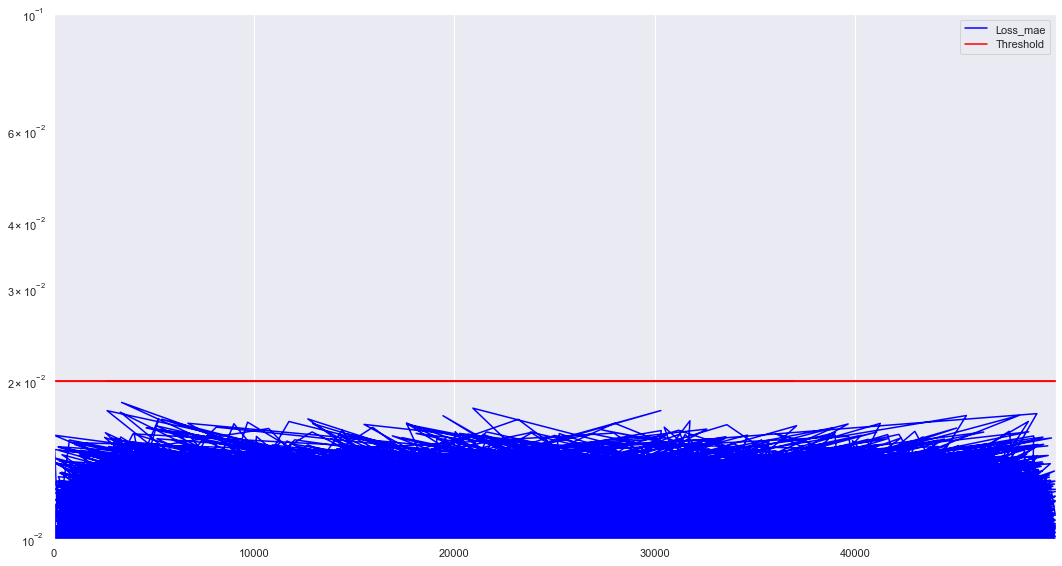

In [114]:
scored.plot(logy= True, figsize=(16,9), color = ['blue','red'], ylim = [1e-2,1e-1])

CHECK WITH DECEPTIVE DATA TO SEE IF IT'S AN ANOMALY

In [141]:
decep_ = decep_samp_vec.iloc[:10000]

In [142]:
decep_

,abl,absolut,accommod,acknowledg,across,actual,ad,add,addit,adult,...,yes,yesterday,yet,york,youll,young,your,yum,yummi,Stars
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,5.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,5.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,5.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,5.0
4,0.0,0.0,0.122884,0.0,0.0,0.0,0.135446,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,5.0
9996,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,5.0
9997,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.0
9998,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,5.0


In [143]:
#normalize data
scaler = MinMaxScaler()
decep = scaler.fit_transform(decep_)

#reshape for LSTM model
decep = decep.reshape(decep.shape[0], 1, decep.shape[1])
decep.shape

(10000, 1, 1001)

In [144]:
decep

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 1.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 1.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 1.        ]],

       ...,

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.25      ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 1.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.29682166, 1.        ]]])

In [145]:
decep_

,abl,absolut,accommod,acknowledg,across,actual,ad,add,addit,adult,...,yes,yesterday,yet,york,youll,young,your,yum,yummi,Stars
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,5.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,5.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,5.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,5.0
4,0.0,0.0,0.122884,0.0,0.0,0.0,0.135446,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,5.0
9996,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,5.0
9997,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.0
9998,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,5.0


In [147]:
X_true_test2.shape

(10000, 1001)

In [150]:
#calculate loss on deceptive set
X_pred = model.predict(decep)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns = decep_.columns)
X_pred.index = decep_.index

scored = pd.DataFrame(index = decep_.index)
Xtest = X_true_test2.reshape(X_true_test2.shape[0], X_true_test2.shape[1])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtest), axis=1)
scored['Threshold'] = 0.02 #testing Threshold at 0.02 according to the histogram
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored

,Loss_mae,Threshold,Anomaly
0,0.007858,0.02,False
1,0.018710,0.02,False
2,0.010992,0.02,False
3,0.015011,0.02,False
4,0.009930,0.02,False
...,...,...,...
9995,0.007781,0.02,False
9996,0.009849,0.02,False
9997,0.010511,0.02,False
9998,0.013817,0.02,False


In [152]:
scored[scored['Anomaly']==True]

,Loss_mae,Threshold,Anomaly
76,0.020822,0.02,True
172,0.020983,0.02,True
220,0.020467,0.02,True
351,0.020382,0.02,True
497,0.020645,0.02,True
...,...,...,...
9332,0.021062,0.02,True
9345,0.021420,0.02,True
9607,0.020991,0.02,True
9637,0.020514,0.02,True


In [164]:
#fit model to the data
nb_epochs = 3
batch_size = 10
history = model.fit(X_true_train2, X_true_train2, epochs=nb_epochs, batch_size = batch_size, validation_split = 0.05).history

Train on 9500 samples, validate on 500 samples
Epoch 1/3
9500/9500 [==============================] - 2s 212us/sample - loss: 0.0032 - val_loss: 0.0031
Epoch 2/3
9500/9500 [==============================] - 2s 179us/sample - loss: 0.0031 - val_loss: 0.0031
Epoch 3/3
9500/9500 [==============================] - 2s 175us/sample - loss: 0.0031 - val_loss: 0.0031


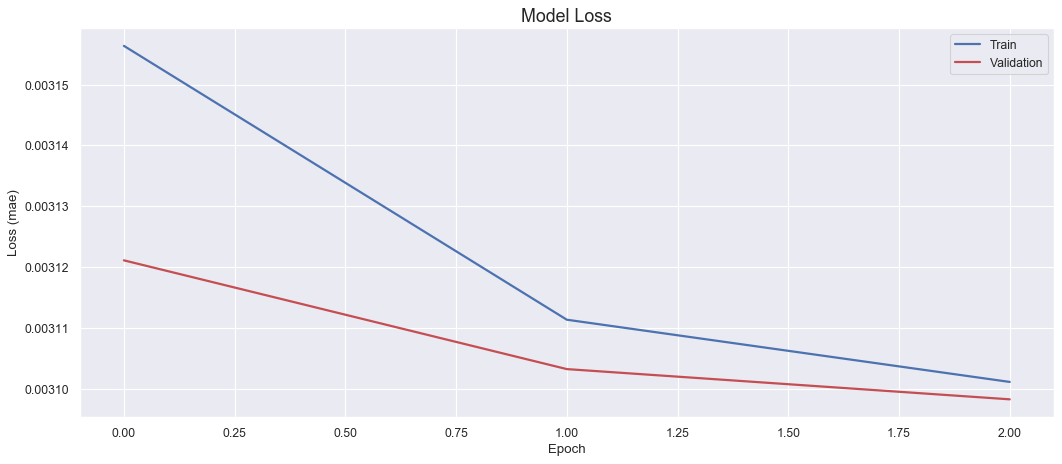

<Figure size 432x288 with 0 Axes>

In [165]:
#plot training losses
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set(color_codes = True)

fig,ax = plt.subplots(figsize=(14,6), dpi=80)
ax.plot(history['loss'],'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label ='Validation', linewidth = 2)
ax.set_title('Model Loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()
plt.savefig('img/training_loss.png')

In [174]:
#plot loss distribution of the training set
X_pred = model.predict(X_true_train2)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[1])
X_pred = pd.DataFrame(X_pred, columns = X_true_train.columns)
X_pred.index = X_true_train.index

scored = pd.DataFrame(index = X_true_train.index)
Xtrain = X_true_train2.reshape(X_true_train2.shape[0], X_true_train2.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtrain), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize= 16)
sns.distplot(scored['Loss_mae'], bins =20, kde= True, color= 'blue');
plt.xlim([0.0,0.03])

ValueError: Length mismatch: Expected axis has 10000 elements, new values have 40000 elements